In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [3]:
%matplotlib notebook

In [4]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

### Load data

In [7]:
foldername = r'/data/new_trap/20200107/Bead3/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

135  files in folder
135  files loaded


In [8]:
bb = bdf_discharge[0]
response_x = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


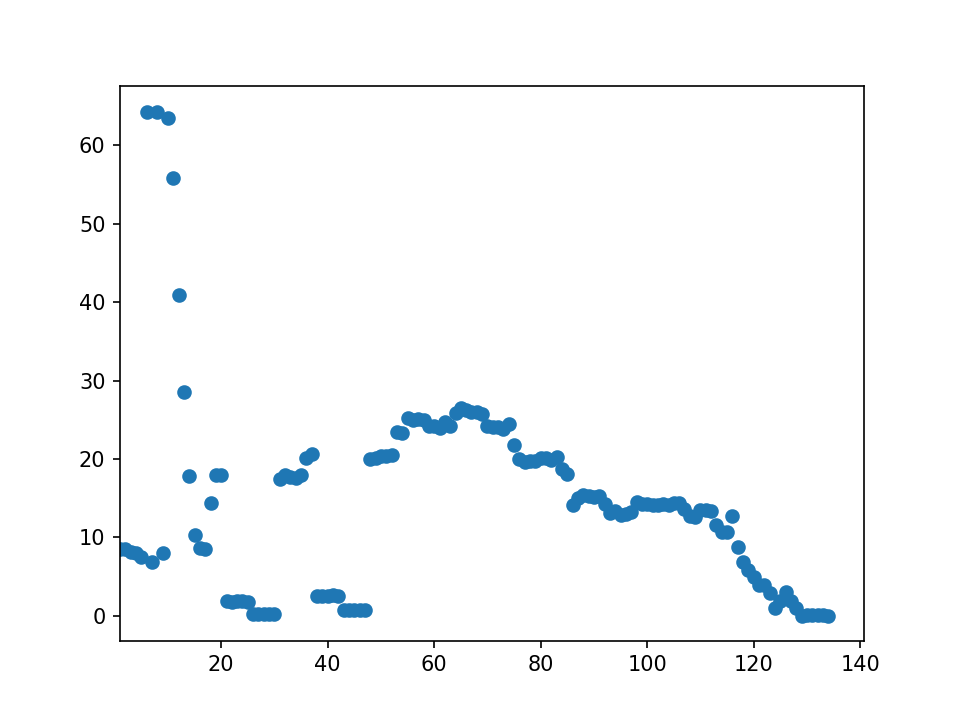

622.1951118233993


In [9]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_x/response_x[128])
ax.set(xlim=(1,None))
print(response_x[48])

In [10]:
bdf_z = bdf_discharge[48:53]
charges = 20
m1s = gfw.build_z_response(bdf_z, drive_freq=151,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  7.43e+03
reduced chi2:  24751.242951209864
***************************************************
Z2-amplitude:  7.49e+03
reduced chi2:  31490.46667322269
***************************************************
Z2-amplitude:  7.54e+03
reduced chi2:  46404.62363280694
***************************************************
Z2-amplitude:  7.57e+03
reduced chi2:  30795.54847734461
***************************************************
Z2-amplitude:  7.58e+03
reduced chi2:  39410.20145424921
Z2 response (amplitude): 7521.23238842297


In [11]:
foldername = r'/data/new_trap/20200107/Bead3/Shaking/Shaking380/'
datasets_num = 1000
gfw.BDFs = load_dir(foldername, file_prefix='Shaking13',max_file=datasets_num)

1000  files in folder
1000  files loaded


<IPython.core.display.Javascript object>


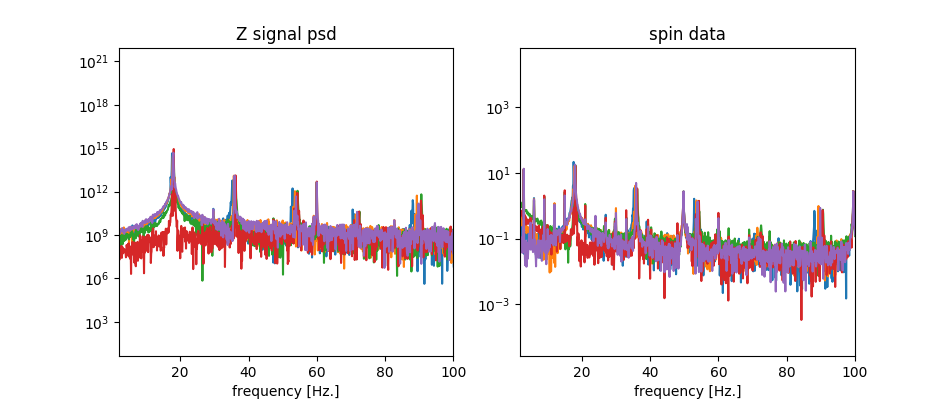

[(2, 100), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'spin data')]

In [102]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for bb in gfw.BDFs[900:950:10]:
    ax[0].semilogy(*bb.psd('z'))
    fft = np.abs(np.fft.rfft(bb.spin_data))
    freq = np.fft.rfftfreq(len(bb.spin_data), d=1./5000)
    ax[1].semilogy(freq,fft)
ax[0].set(xlim=(2,100),xlabel='frequency [Hz.]', title='Z signal psd')
ax[1].set(xlim=(2,100),xlabel='frequency [Hz.]', title='spin data')

In [12]:
gfw.build_noise_array(sideband_freq=23, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.3277546306380127
x3 noise rms:  0.07459006627621305


In [14]:
fit_kwargs = {'alpha': 1e-2, 'phase': 0, 'error_alpha': 0.01, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [1e-5, 1], 'limit_phase': [-5000,5000],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
min_3_5 = []
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    min_3_5.append(gfw.get_alpha(bdf=bb, center_freq=18, bandwidth=1, direction='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs)[2])

0 / 1000
Separation (face to face):  6.515678062789084
Stroke:  100.5169378208387
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha:  2.89e-03
reduced chi2:  179.72307959015836
1 / 1000
Separation (face to face):  6.516366445440246
Stroke:  100.50445140747705
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.05e-02
reduced chi2:  110.07512556462787
2 / 1000
Separation (face to face):  6.516990786457631
Stroke:  100.501867018059
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.85e-02
reduced chi2:  268.67699149609984
3 / 1000
Separation (face to face):  6.516607021718732
Stroke:  100.50046737602777
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***

***************************************************
alpha:  2.25e-02
reduced chi2:  181.45338815201225
26 / 1000
Separation (face to face):  6.512607095806095
Stroke:  100.49435479899238
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.65e-02
reduced chi2:  200.2257485589512
27 / 1000
Separation (face to face):  6.51518610924146
Stroke:  100.49354955221581
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.87e-03
reduced chi2:  166.7020502569448
28 / 1000
Separation (face to face):  6.513836993228926
Stroke:  100.49339066232152
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*

***************************************************
alpha:  7.24e-03
reduced chi2:  157.6053025494614
51 / 1000
Separation (face to face):  6.516683256091289
Stroke:  100.49193868098894
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.65e-02
reduced chi2:  72.55450828418648
52 / 1000
Separation (face to face):  6.51566797103934
Stroke:  100.49177269677936
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.00e-02
reduced chi2:  191.4160436849644
53 / 1000
Separation (face to face):  6.5165858895897255
Stroke:  100.49174445184585
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*

***************************************************
alpha:  8.89e-03
reduced chi2:  153.9055076885903
76 / 1000
Separation (face to face):  6.517606829309136
Stroke:  100.49043553177916
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.43e-02
reduced chi2:  116.55777998242306
77 / 1000
Separation (face to face):  6.517646570923693
Stroke:  100.49051118839299
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.16e-03
reduced chi2:  148.24366771778836
78 / 1000
Separation (face to face):  6.514898336870862
Stroke:  100.49061190106168
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  1.92e-02
reduced chi2:  176.67757948444236
101 / 1000
Separation (face to face):  6.512837646350226
Stroke:  100.49047765371317
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.02e-02
reduced chi2:  97.23145823143913
102 / 1000
Separation (face to face):  6.512946945756175
Stroke:  100.49031750026279
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.98e-03
reduced chi2:  123.51119446189986
103 / 1000
Separation (face to face):  6.512715966155758
Stroke:  100.49055222146758
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  1.69e-02
reduced chi2:  254.954184212912
126 / 1000
Separation (face to face):  6.514194156549115
Stroke:  100.48905210641281
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.03e-02
reduced chi2:  61.89038374482485
127 / 1000
Separation (face to face):  6.513473410333267
Stroke:  100.48960286995833
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.03e-02
reduced chi2:  275.2328607210377
128 / 1000
Separation (face to face):  6.516761613238009
Stroke:  100.48916064472571
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  1.32e-02
reduced chi2:  301.0063302620303
151 / 1000
Separation (face to face):  6.515753551414582
Stroke:  100.48919720453425
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.26e-02
reduced chi2:  174.11866933494014
152 / 1000
Separation (face to face):  6.517446400906385
Stroke:  100.48858595812018
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.99e-03
reduced chi2:  462.21799757834475
153 / 1000
Separation (face to face):  6.514691713408899
Stroke:  100.48881103219733
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  3.78e-03
reduced chi2:  208.58819975583256
176 / 1000
Separation (face to face):  6.509682223767106
Stroke:  100.48857108124993
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.38e-02
reduced chi2:  248.1937637192879
177 / 1000
Separation (face to face):  6.512181598450672
Stroke:  100.48845713319292
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  6.52e-03
reduced chi2:  100.6984215897349
178 / 1000
Separation (face to face):  6.511506301180281
Stroke:  100.48801245136724
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  8.71e-03
reduced chi2:  154.77876295866358
201 / 1000
Separation (face to face):  6.513771493787692
Stroke:  100.487577064164
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.79e-03
reduced chi2:  222.3051312486809
202 / 1000
Separation (face to face):  6.513989214364335
Stroke:  100.4876711519522
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.31e-02
reduced chi2:  121.3070161025367
203 / 1000
Separation (face to face):  6.515185521635919
Stroke:  100.4874159816532
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
*

***************************************************
alpha:  8.77e-03
reduced chi2:  177.03272449252282
226 / 1000
Separation (face to face):  6.51519849693708
Stroke:  100.48790757592157
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.06e-02
reduced chi2:  146.42886932817845
227 / 1000
Separation (face to face):  6.515051489872155
Stroke:  100.48815429664101
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.85e-02
reduced chi2:  95.06720903804325
228 / 1000
Separation (face to face):  6.515888919616861
Stroke:  100.48778333420472
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  5.40e-03
reduced chi2:  107.84153361649263
251 / 1000
Separation (face to face):  6.514946645649593
Stroke:  100.48730950485995
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.84e-03
reduced chi2:  241.9426362997703
252 / 1000
Separation (face to face):  6.515313246862467
Stroke:  100.48768006674523
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.04e-02
reduced chi2:  122.45120221225504
253 / 1000
Separation (face to face):  6.512346280482211
Stroke:  100.48712341416328
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  2.32e-03
reduced chi2:  76.44873770908518
276 / 1000
Separation (face to face):  6.5104589138199795
Stroke:  100.48726451816572
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.91e-03
reduced chi2:  115.35231718457955
277 / 1000
Separation (face to face):  6.510317096139579
Stroke:  100.4871135419287
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.06e-03
reduced chi2:  128.7886970532261
278 / 1000
Separation (face to face):  6.510955629302179
Stroke:  100.48722876170986
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  5.25e-03
reduced chi2:  65.82363346892407
301 / 1000
Separation (face to face):  6.516437920682881
Stroke:  100.48685138918424
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.21e-03
reduced chi2:  211.8332107757679
302 / 1000
Separation (face to face):  6.516076287648707
Stroke:  100.48700856310992
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.77e-03
reduced chi2:  75.8969197888962
303 / 1000
Separation (face to face):  6.515867196690726
Stroke:  100.48690141907008
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  8.10e-03
reduced chi2:  371.0117106085333
326 / 1000
Separation (face to face):  6.515221689790826
Stroke:  100.48633786795195
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.21e-02
reduced chi2:  188.26526576363457
327 / 1000
Separation (face to face):  6.514960199152744
Stroke:  100.48637942284222
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.41e-02
reduced chi2:  222.96619409891434
328 / 1000
Separation (face to face):  6.515597159419746
Stroke:  100.48601812102656
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  1.19e-02
reduced chi2:  209.70466481806784
351 / 1000
Separation (face to face):  6.510570956108188
Stroke:  100.48671622057864
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  6.94e-03
reduced chi2:  718.3579157304663
352 / 1000
Separation (face to face):  6.512425889916392
Stroke:  100.48663725262104
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.47e-02
reduced chi2:  446.7335164377729
353 / 1000
Separation (face to face):  6.512251393417875
Stroke:  100.48690611561108
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  3.28e-02
reduced chi2:  54255.329045334365
376 / 1000
Separation (face to face):  6.516813316157743
Stroke:  100.48626385893542
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.84e-02
reduced chi2:  65908.46516848991
377 / 1000
Separation (face to face):  6.515819872258964
Stroke:  100.48682798523178
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.62e-02
reduced chi2:  57847.42167436744
378 / 1000
Separation (face to face):  6.5176633974478815
Stroke:  100.48596421763594
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  6.46e-01
reduced chi2:  167811.1217504126
401 / 1000
Separation (face to face):  6.5188167824377725
Stroke:  100.48606876418735
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.49e-01
reduced chi2:  132086.54432744885
402 / 1000
Separation (face to face):  6.516839770851822
Stroke:  100.48552542714657
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.94e-01
reduced chi2:  43338.731597550825
403 / 1000
Separation (face to face):  6.516819052488108
Stroke:  100.48654537456325
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  1.44e-01
reduced chi2:  269775.0756781466
426 / 1000
Separation (face to face):  6.515049978774448
Stroke:  100.48593582257072
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.51e-01
reduced chi2:  270175.31792966824
427 / 1000
Separation (face to face):  6.513162104718651
Stroke:  100.48614731373958
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.72e-02
reduced chi2:  198995.63025408032
428 / 1000
Separation (face to face):  6.513677114140171
Stroke:  100.4861839268674
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  8.08e-03
reduced chi2:  9385.028799736629
451 / 1000
Separation (face to face):  6.516990272857219
Stroke:  100.48572776410838
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.12e-02
reduced chi2:  15117.080726173726
452 / 1000
Separation (face to face):  6.516498684819146
Stroke:  100.48595727189442
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.58e-02
reduced chi2:  14036.531064037366
453 / 1000
Separation (face to face):  6.5172831040159505
Stroke:  100.48536705789834
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  2.38e-02
reduced chi2:  2720.6704042845927
476 / 1000
Separation (face to face):  6.520444147535249
Stroke:  100.48574721128873
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e-02
reduced chi2:  1472.0763661841381
477 / 1000
Separation (face to face):  6.521001175641549
Stroke:  100.48573386590456
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.68e-03
reduced chi2:  1654.6759061874095
478 / 1000
Separation (face to face):  6.520357999619398
Stroke:  100.48542124829727
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  1.04e-02
reduced chi2:  251.95649496706315
501 / 1000
Separation (face to face):  6.514718753288127
Stroke:  100.48565463898932
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.13e-03
reduced chi2:  465.49261723301294
502 / 1000
Separation (face to face):  6.515891899838243
Stroke:  100.4858685052515
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.93e-02
reduced chi2:  365.425955263461
503 / 1000
Separation (face to face):  6.517697269425502
Stroke:  100.48543089682731
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selecte

***************************************************
alpha:  1.11e-02
reduced chi2:  258.9763137975455
526 / 1000
Separation (face to face):  6.515875843040112
Stroke:  100.48565925275142
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.08e-03
reduced chi2:  284.4236887728466
527 / 1000
Separation (face to face):  6.515632879156135
Stroke:  100.48520481001631
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.26e-03
reduced chi2:  316.0435503508973
528 / 1000
Separation (face to face):  6.515386851439393
Stroke:  100.48550819087468
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selecte

***************************************************
alpha:  1.15e-02
reduced chi2:  198.83341807298893
551 / 1000
Separation (face to face):  6.516190556546723
Stroke:  100.48549558553647
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.58e-03
reduced chi2:  146.742562187078
552 / 1000
Separation (face to face):  6.515974054648813
Stroke:  100.48519430339456
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.60e-03
reduced chi2:  123.74130332386812
553 / 1000
Separation (face to face):  6.519276647387107
Stroke:  100.48504253394962
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  1.34e-02
reduced chi2:  2268.832220938519
576 / 1000
Separation (face to face):  6.518903208376946
Stroke:  100.48519714193951
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.52e-02
reduced chi2:  1099.3831582666367
577 / 1000
Separation (face to face):  6.516583441268471
Stroke:  100.48523224802709
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.85e-03
reduced chi2:  567.150535376916
578 / 1000
Separation (face to face):  6.517301082448261
Stroke:  100.4850164313094
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  1.43e-02
reduced chi2:  171.59466642946614
601 / 1000
Separation (face to face):  6.5150283155733515
Stroke:  100.48563526100781
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.06e-03
reduced chi2:  596.4369129825023
602 / 1000
Separation (face to face):  6.516717440905699
Stroke:  100.48444279566313
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.05e-02
reduced chi2:  465.072352530176
603 / 1000
Separation (face to face):  6.51555339838311
Stroke:  100.4851896939851
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  3.50e-02
reduced chi2:  112666.40351630858
626 / 1000
Separation (face to face):  6.515684075718559
Stroke:  100.48509158057195
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.12e-02
reduced chi2:  135987.21023010858
627 / 1000
Separation (face to face):  6.515428941619893
Stroke:  100.48456331006119
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  6.34e-02
reduced chi2:  102484.0767737883
628 / 1000
Separation (face to face):  6.517073972542539
Stroke:  100.48480414383093
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  2.60e-01
reduced chi2:  19455603.86333351
651 / 1000
Separation (face to face):  6.518089818021826
Stroke:  100.4843911429186
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.68e-01
reduced chi2:  15863706.101139799
652 / 1000
Separation (face to face):  6.5171507581975785
Stroke:  100.484041007497
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.84e-01
reduced chi2:  17530934.953430347
653 / 1000
Separation (face to face):  6.515441703825138
Stroke:  100.4847975521078
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  4.01e-02
reduced chi2:  123564.25742439395
676 / 1000
Separation (face to face):  6.515943413933973
Stroke:  100.48440888172912
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.60e-02
reduced chi2:  110533.43065779515
677 / 1000
Separation (face to face):  6.515045413387474
Stroke:  100.48413429958009
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  6.01e-02
reduced chi2:  111925.13361307551
678 / 1000
Separation (face to face):  6.5169370282377255
Stroke:  100.48482855634307
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sel

***************************************************
alpha:  1.00e+00
reduced chi2:  37665902.77440439
701 / 1000
Separation (face to face):  6.5168462171299435
Stroke:  100.48373231995357
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  46022770.92396781
702 / 1000
Separation (face to face):  6.515864668036135
Stroke:  100.4837596724568
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.99e-01
reduced chi2:  37154744.62491563
703 / 1000
Separation (face to face):  6.513721696671359
Stroke:  100.48469530258856
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selecte

***************************************************
alpha:  9.80e-01
reduced chi2:  22804401.832368575
726 / 1000
Separation (face to face):  6.5204340929277915
Stroke:  100.48446881896902
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  18257044.99191544
727 / 1000
Separation (face to face):  6.5195151483966125
Stroke:  100.48481551901928
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.07e-01
reduced chi2:  22006724.84819152
728 / 1000
Separation (face to face):  6.519536100369953
Stroke:  100.48425197560867
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  1.00e+00
reduced chi2:  33561028.875117265
751 / 1000
Separation (face to face):  6.516690402200913
Stroke:  100.48500355652783
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  30447771.49076851
752 / 1000
Separation (face to face):  6.516368990016792
Stroke:  100.48475021320165
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.25e-01
reduced chi2:  30300587.464141797
753 / 1000
Separation (face to face):  6.515644487018937
Stroke:  100.48421977889109
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  1.00e+00
reduced chi2:  40315916.89174496
776 / 1000
Separation (face to face):  6.514456387168741
Stroke:  100.48496423389562
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  30008093.25300921
777 / 1000
Separation (face to face):  6.51535374983755
Stroke:  100.48470963948259
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  35019435.385729104
778 / 1000
Separation (face to face):  6.5152290480627695
Stroke:  100.48494253520877
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  6.42e-01
reduced chi2:  6999469.613192421
801 / 1000
Separation (face to face):  6.5149987206637885
Stroke:  100.4845543426822
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.61e-01
reduced chi2:  7923420.3461570805
802 / 1000
Separation (face to face):  6.515405481711673
Stroke:  100.48452976451964
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.52e-01
reduced chi2:  10139791.55836697
803 / 1000
Separation (face to face):  6.518611549955699
Stroke:  100.48415822235376
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is select

***************************************************
alpha:  7.25e-01
reduced chi2:  19888496.571565837
826 / 1000
Separation (face to face):  6.516902515499316
Stroke:  100.48398067150396
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  19671112.05618064
827 / 1000
Separation (face to face):  6.515900864664479
Stroke:  100.48348566727329
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.67e-01
reduced chi2:  17492519.5108434
828 / 1000
Separation (face to face):  6.514507901914191
Stroke:  100.48341244781714
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selecte

***************************************************
alpha:  1.00e+00
reduced chi2:  27270740.178648166
851 / 1000
Separation (face to face):  6.514003947117919
Stroke:  100.48332030386045
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  24546082.466972627
852 / 1000
Separation (face to face):  6.512758080036155
Stroke:  100.48370265163474
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  23196086.888053864
853 / 1000
Separation (face to face):  6.512444753480883
Stroke:  100.48382470305222
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  6.82e-01
reduced chi2:  26797437.799285904
876 / 1000
Separation (face to face):  6.513943143039091
Stroke:  100.48304759890662
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.24e-01
reduced chi2:  32586592.966020603
877 / 1000
Separation (face to face):  6.514597665022427
Stroke:  100.48334505728246
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.82e-01
reduced chi2:  22312046.526776493
878 / 1000
Separation (face to face):  6.514621497072289
Stroke:  100.48274403533347
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sele

***************************************************
alpha:  6.06e-01
reduced chi2:  11186273.455474138
901 / 1000
Separation (face to face):  6.516861071561243
Stroke:  100.48310612654906
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.95e-01
reduced chi2:  20626584.04280603
902 / 1000
Separation (face to face):  6.5196550491615195
Stroke:  100.48313476861303
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.93e-01
reduced chi2:  15643156.69923689
903 / 1000
Separation (face to face):  6.517914149698958
Stroke:  100.48363043438296
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selec

***************************************************
alpha:  9.93e-01
reduced chi2:  27320438.96417636
926 / 1000
Separation (face to face):  6.513736427133926
Stroke:  100.48362916466363
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  25902408.07931693
927 / 1000
Separation (face to face):  6.51520420718615
Stroke:  100.48375605105917
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.00e+00
reduced chi2:  25847131.19519682
928 / 1000
Separation (face to face):  6.515547167872375
Stroke:  100.48349331448912
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  9.21e-01
reduced chi2:  19758557.932899
951 / 1000
Separation (face to face):  6.514808827095896
Stroke:  100.48330479043396
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.28e-01
reduced chi2:  21108239.886161406
952 / 1000
Separation (face to face):  6.515723556548812
Stroke:  100.48365682125429
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.95e-01
reduced chi2:  20672230.28753219
953 / 1000
Separation (face to face):  6.515199764362569
Stroke:  100.48345321907603
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected

***************************************************
alpha:  1.00e+00
reduced chi2:  10589274.253300609
976 / 1000
Separation (face to face):  6.516343468363777
Stroke:  100.48354902132769
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  9.61e-01
reduced chi2:  10558297.413564254
977 / 1000
Separation (face to face):  6.5156305155686365
Stroke:  100.48334051609814
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.77e-01
reduced chi2:  13500594.83914182
978 / 1000
Separation (face to face):  6.5181068505958475
Stroke:  100.48341068157653
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is sel

In [108]:
m_3_5 = [m_.values[0] for m_ in min_3_5[:350]]
m_3_noise = [m_.values[0] for m_ in min_3_5_n[:350]]

<IPython.core.display.Javascript object>


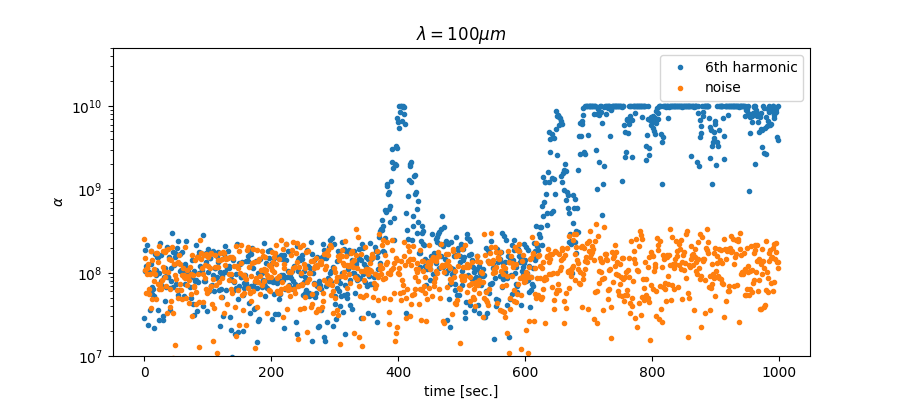

In [107]:
_, ax = plt.subplots(figsize=(9,4))
ax.semilogy(np.arange(1000), np.array(m_3_5)*1e10, '.', label=r'6th harmonic')
ax.semilogy(np.arange(1000), np.array(m_3_noise)*1e10, '.', label=r'noise')
ax.set(ylim=(1e7,5e10), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax.legend()

<IPython.core.display.Javascript object>


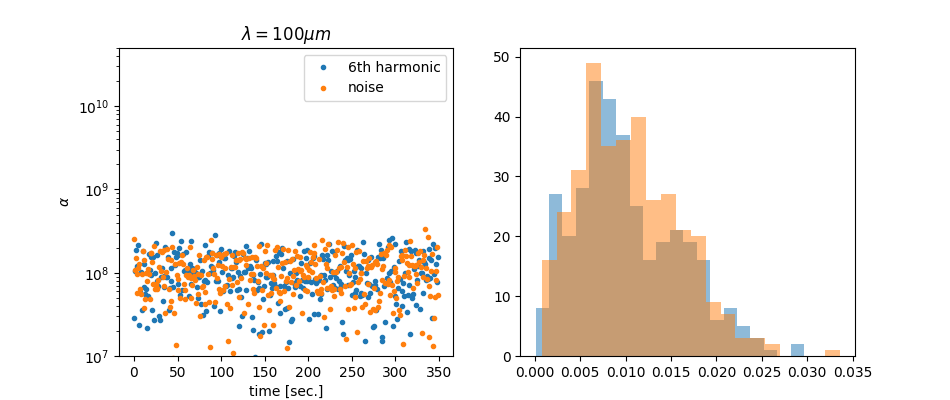

(array([16., 24., 31., 49., 35., 36., 40., 26., 27., 21., 20.,  9.,  7.,
         3.,  3.,  2.,  0.,  0.,  0.,  1.]),
 array([0.00075839, 0.00239923, 0.00404007, 0.00568091, 0.00732175,
        0.00896259, 0.01060343, 0.01224427, 0.01388511, 0.01552595,
        0.01716679, 0.01880763, 0.02044847, 0.02208931, 0.02373014,
        0.02537098, 0.02701182, 0.02865266, 0.0302935 , 0.03193434,
        0.03357518]),
 <a list of 20 Patch objects>)

In [109]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(np.arange(350), np.array(m_3_5)*1e10, '.', label=r'6th harmonic')
ax[0].semilogy(np.arange(350), np.array(m_3_noise)*1e10, '.', label=r'noise')
ax[0].set(ylim=(1e7,5e10), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax[0].legend()
ax[1].hist(m_3_5,bins=20,alpha=0.5)
ax[1].hist(m_3_noise,bins=20,alpha=0.5)

In [117]:
print('6th hsrmonic mean: ',np.mean(m_3_5), ' error: ', np.std(m_3_5)/np.sqrt(350))
print('noise mean: ',np.mean(m_3_noise), ' error: ', np.std(m_3_noise)/np.sqrt(350))
print('estimated limit: ', format(np.std(m_3_5)/np.sqrt(350)*2*1e10,"5.2e"))

6th hsrmonic mean:  0.010176552255184384  error:  0.0003071952786798577
noise mean:  0.010498701965504337  error:  0.0002957590986695374
estimated limit:  6.14e+06


### Limit

In [1]:
L = np.logspace(0.3, 3, 30)*1e-6
lim_z_p2 = []
datasets_num = 10
for L_ in L:
    fit_kwargs = {'alpha': 1e-2, 'phase': 0, 'error_alpha': 0.01, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [1e-5, 1], 'limit_phase': [-5000,5000],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
    gfw.build_noise_array(sideband_freq=22, bandwidth=1)
    m_tmp = [gfw.get_alpha(bdf=gfw.BDFs[i], center_freq=18, bandwidth=1, direction='z',
                          x_focous=389.0, frequency=3, lambda_par=L_, height=4e-6, suppress_print=False,
                          **fit_kwargs)[0] for i in range(datasets_num)]
    lim_z_p2.append(np.std(m_tmp)/np.sqrt(datasets_num)*2*1e10)

NameError: name 'np' is not defined

In [130]:
print(lim_z)

[369969796.22058743, 553522366.6151105, 525324126.7905534, 297565732.33821964, 167714389.93856052, 126907734.63914073, 82811747.33721207, 53886437.11448089, 46013911.57732058, 34168390.29768623, 27251639.712698773, 24978659.290526845, 20850615.604422096, 19844279.71874079, 17444374.1932469, 15602391.01398898, 14859725.090602987, 14503177.98044224, 13794127.51738709, 13647903.869953563, 13243464.665188009, 12815875.373230588, 12728210.733825454, 12597778.516403573, 12389974.001151772, 12479788.918083215, 12333403.385045169, 12297443.425834896, 12335158.746892435, 12211203.210231083, 12206202.656859985, 12116120.438651001, 12106102.516840497, 12139019.664487839, 12110292.152866747, 12105337.620748756, 12118386.375284547, 12120819.632321566, 12071154.53584253, 12048128.606036514, 12114495.594045049, 12088153.619626254, 12114801.711413879, 12088272.911054857, 12060613.14762457, 12227742.036596233, 12044259.194369277, 12131149.70601253, 12069463.47756153, 12112224.558345413]


<IPython.core.display.Javascript object>


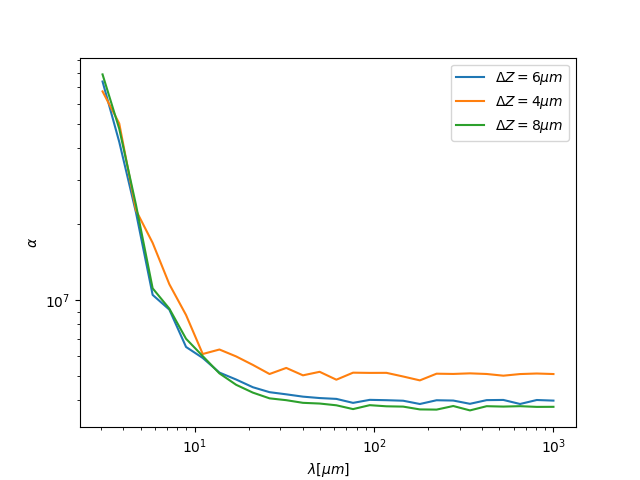

In [151]:
_,ax = plt.subplots()
ax.loglog(L[2:]*1e6,np.array(lim_z[2:])/10, label=r'$\Delta Z=6 \mu m$')
ax.loglog(L[2:]*1e6,np.array(lim_z_p2[2:])/10, label=r'$\Delta Z=4 \mu m$')
ax.loglog(L[2:]*1e6,np.array(lim_z_n2[2:])/10, label=r'$\Delta Z=8 \mu m$')
ax.set(xlabel='$\lambda [\mu m]$', ylabel=r'$\alpha$')
ax.legend()